In [1]:
"""
Plot:
    - Confusion matrices for the best models

"""




import numpy as np
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from standardizer import normate_dataset_period
import datetime as datetime
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction import MinimalFCParameters
from preprocessor import preprocessor
import os

In [2]:
from sklearn.preprocessing import MinMaxScaler
data_path = "./data/complete_smartpunch_dataset_7606punches.json"


#if data is the raw data file
if data_path.split('.')[-1]=='json':
    processor = preprocessor(filepath=data_path, data_stage='raw')
    processor.pre_process()
    period_length = 0
    sampling_rate = 0
    
#else data is already processed
else:
    processor = preprocessor(filepath=data_path, data_stage='processed')
    period_length = int( data_path.split('_')[2] )
    sampling_rate = int( data_path.split('_')[3].split('.')[0] )
        
features = processor.extract_features()
labels = processor.get_labels()
    
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)
    
norm = MinMaxScaler().fit(X_train)
    
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)



    



Feature Extraction: 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]


In [3]:
#==========================
#
# Data loading for adaboost
#
#==========================


data_path = "./data/punch_norm_1500_10000.csv"


#if data is the raw data file
if data_path.split('.')[-1]=='json':
    processor = preprocessor(filepath=data_path, data_stage='raw')
    processor.pre_process()
    period_length = 0
    sampling_rate = 0
    
#else data is already processed
else:
    processor = preprocessor(filepath=data_path, data_stage='processed')
    period_length = int( data_path.split('_')[2] )
    sampling_rate = int( data_path.split('_')[3].split('.')[0] )
        
features = processor.extract_features()
labels = processor.get_labels()
    
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(features, labels, test_size=0.1, random_state=42)
    
norm = MinMaxScaler().fit(X_train_norm)
    
X_train_norm = norm.transform(X_train_norm)
X_test_norm = norm.transform(X_test_norm)




Feature Extraction: 100%|██████████| 20/20 [00:09<00:00,  2.05it/s]


In [4]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [6]:
#Best classifiers
svc = SVC(C=100, kernel='rbf').fit(X_train,y_train)
forest = RandomForestClassifier(criterion='entropy', max_depth=80, n_estimators=120).fit(X_train,y_train)
logreg = LogisticRegression(C=100).fit(X_train,y_train)
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), learning_rate=1, n_estimators=200).fit(X_train_norm,y_train_norm)
bayes = GaussianNB(var_smoothing=0.0001).fit(X_train,y_train)

best_clfs = [logreg, bayes, svc, adaboost, forest]

C:\Users\dante\anaconda3\envs\thesis_copy2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\dante\AppData\Local\Temp\ipykernel_1564\60838408.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


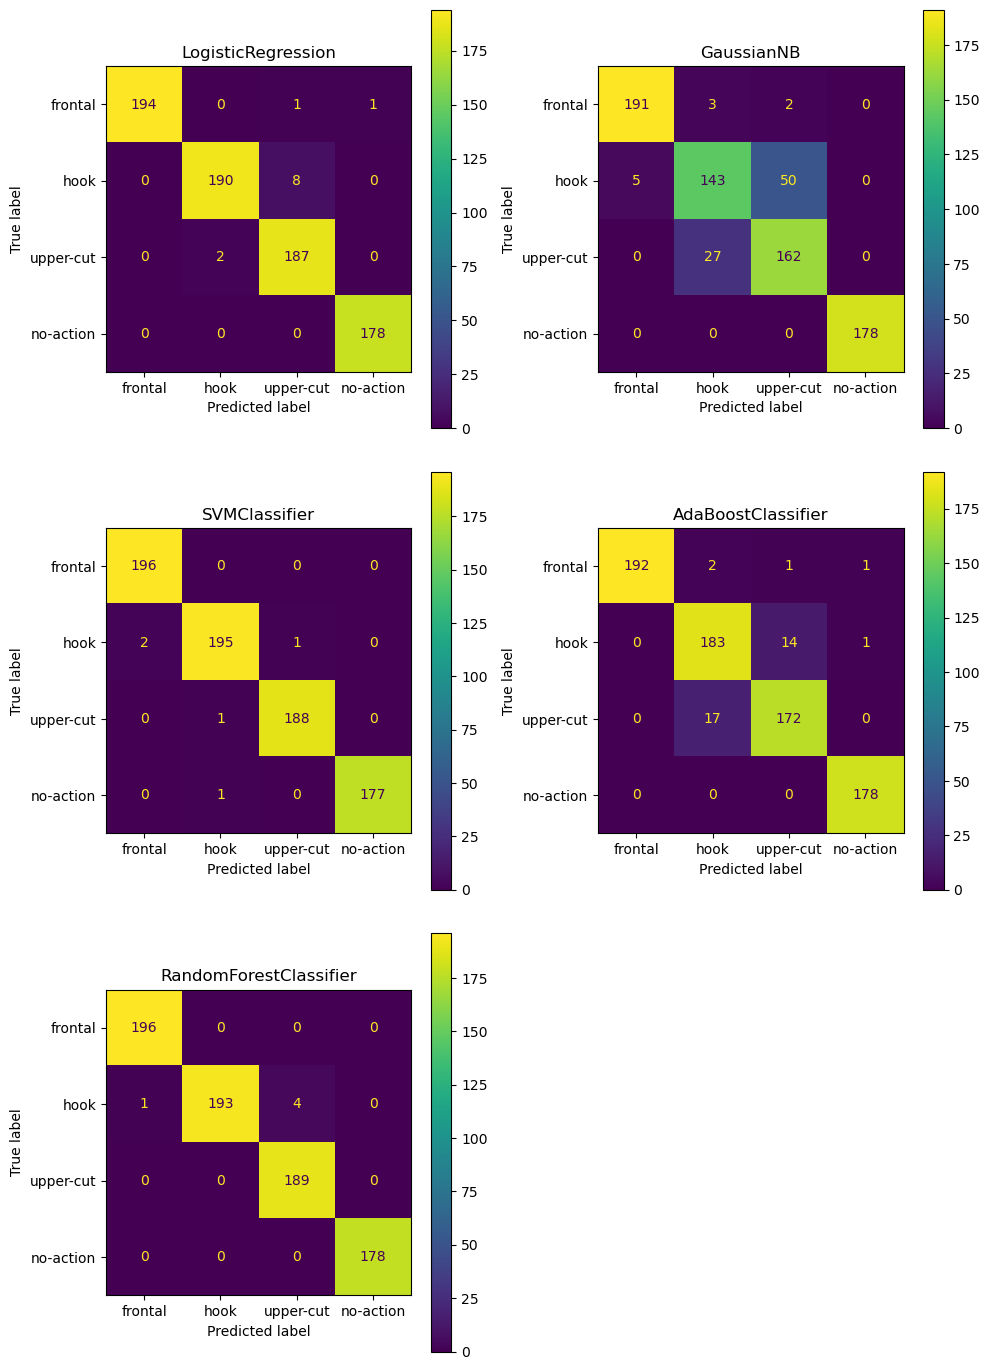

In [7]:
class_names = ['frontal', 'hook', 'upper-cut', 'no-action']

fig, ax = plt.subplots(3,2, figsize=(10,14))

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, ax=ax[0,0], display_labels=class_names)
ax[0,0].title.set_text("LogisticRegression")

ConfusionMatrixDisplay.from_estimator(bayes, X_test, y_test, ax=ax[0,1], display_labels=class_names)
ax[0,1].title.set_text("GaussianNB")

ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test, ax=ax[1,0], display_labels=class_names)
ax[1,0].title.set_text("SVMClassifier")

ConfusionMatrixDisplay.from_estimator(adaboost, X_test_norm, y_test_norm, ax=ax[1,1], display_labels=class_names)
ax[1,1].title.set_text("AdaBoostClassifier")

ConfusionMatrixDisplay.from_estimator(forest, X_test, y_test, ax=ax[2,0], display_labels=class_names)
ax[2,0].title.set_text("RandomForestClassifier")

ax[2,1].axis('off')
    
#fig.suptitle("Confusion matrices for the tuned classifiers")
fig.tight_layout()
fig.show()


In [22]:
#fig.savefig("./confusion_matrices.png", dpi=200)

In [8]:
import shap


X100 = shap.utils.sample(X_train, 100)
X100_norm = shap.utils.sample(X_train_norm, 100)


In [32]:
shap_values_forest = shap_values

#adaboost
explainer = shap.Explainer(adaboost.predict, X100)
shap_values_adaboost = explainer(X_train)

#SVC
explainer = shap.Explainer(svc.predict, X100)
shap_values_svc = explainer(X_train)

#GaussianNB
explainer = shap.Explainer(bayes.predict, X100)
shap_values_bayes = explainer(X_train) 

#logreg
explainer = shap.Explainer(logreg.predict, X100)
shap_values_logreg = explainer(X_train)




Permutation explainer: 6846it [4:21:17,  2.29s/it]                            
Permutation explainer: 6846it [3:04:49,  1.62s/it]                             
Permutation explainer: 6846it [08:05, 13.81it/s]                          
Permutation explainer: 6846it [02:34, 41.22it/s]                          


In [43]:
shap_df = pd.DataFrame([shap_values_logreg.mean(0).values,
                        shap_values_bayes.mean(0).values,
                        shap_values_svc.mean(0).values,
                        shap_values_adaboost.mean(0).values,
                        shap_values_forest.mean(0).values],
                       columns=feature_names
                      )

In [64]:
shap_values_logreg[0].values

array([-0.025625,  0.025   , -0.005   , -0.006875, -0.021875, -0.005   ,
       -0.016875, -0.039375, -0.03125 , -0.00125 ,  0.015   ,  0.19125 ,
       -0.184375,  0.015   , -0.039375,  0.025625, -0.061875,  0.09625 ,
        0.001875,  0.003125,  0.119375, -0.07875 ,  0.368125, -0.01875 ,
       -0.2     ,  0.236875,  0.013125,  0.10125 , -0.09375 ,  0.028125])

In [69]:
all_shaps = [shap_values_logreg, shap_values_bayes, shap_values_svc, shap_values_adaboost, shap_values_forest]

for shap, clf in enumerate(clf_names):
    shap_df = pd.DataFrame(all_shaps[i].values, columns=feature_names)
    shap_df.to_csv(f"./data/shap_values_{clf}.csv")

In [68]:
pd.DataFrame(all_shaps[i].values, columns=feature_names)

,x__sum_values,x__median,x__mean,x__length,x__standard_deviation,x__variance,x__root_mean_square,x__maximum,x__absolute_maximum,x__minimum,...,z__sum_values,z__median,z__mean,z__length,z__standard_deviation,z__variance,z__root_mean_square,z__maximum,z__absolute_maximum,z__minimum
0,0.000000,0.040000,0.001250,0.005000,-0.043125,-0.110000,-0.055000,0.025000,-0.023750,-0.024375,...,0.073125,-1.875000e-03,0.301875,0.000625,0.028750,-0.018125,0.126875,0.078125,0.003750,0.008125
1,-0.010625,-0.105000,-0.001875,-0.061250,-0.007500,-0.063750,-0.041875,-0.002500,-0.108750,-0.030625,...,0.004375,-3.750000e-03,0.342500,-0.006875,-0.028125,-0.066250,-0.045000,0.014375,-0.025625,-0.001250
2,-0.001250,0.013750,-0.002500,-0.005000,-0.046875,-0.043750,-0.005000,-0.015625,-0.002500,-0.015625,...,-0.041250,-1.562500e-02,-0.110000,-0.166250,-0.011250,-0.003125,-0.012500,-0.006250,-0.003125,-0.020625
3,-0.005000,-0.004375,-0.007500,-0.040625,-0.043750,-0.065000,-0.033125,0.002500,-0.051875,-0.078125,...,0.001875,1.875000e-03,0.081875,-0.087500,-0.071875,-0.031875,-0.031250,0.029375,-0.058750,-0.002500
4,-0.003125,0.003125,-0.001250,-0.003125,-0.046875,-0.111875,0.000625,-0.021250,-0.009375,-0.020000,...,-0.038125,-3.125000e-03,-0.117500,-0.143750,-0.023750,-0.035000,-0.036875,-0.025625,-0.023125,-0.013750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840,0.003750,-0.011250,-0.007500,-0.038125,-0.058125,-0.068125,-0.018750,-0.088750,-0.041250,0.008125,...,0.018750,-8.125000e-03,0.270000,-0.073750,-0.038750,-0.030625,-0.006875,-0.023750,-0.023750,0.001875
6841,-0.003750,-0.003125,-0.003125,-0.053125,-0.060625,-0.001250,-0.062500,-0.009375,-0.007500,-0.000625,...,-0.057500,-7.500000e-03,-0.051875,-0.081875,-0.015625,-0.015000,-0.020000,-0.030625,-0.017500,-0.028750
6842,0.010000,0.010625,0.000625,-0.055000,-0.099375,-0.065000,-0.125625,0.001250,-0.075625,-0.024375,...,-0.148125,7.806256e-18,-0.369375,-0.010625,-0.031875,-0.035000,-0.050000,-0.047500,-0.030625,-0.073125
6843,-0.003750,0.008750,0.001875,0.075625,0.081250,0.289375,0.071875,0.049375,0.243750,0.006875,...,0.000000,-4.375000e-03,-0.089375,0.336250,0.064375,-0.009375,-0.006875,-0.029375,-0.011875,0.011875


In [8]:
with open("./data/shap_values_LogisticRegression.csv") as fp:
    shap_values_logreg = pd.read_csv(fp, index_col=0)
    
with open("./data/shap_values_GaussianNB.csv") as fp:
    shap_values_bayes = pd.read_csv(fp, index_col=0)
    
with open("./data/shap_values_SVC.csv") as fp:
    shap_values_svc = pd.read_csv(fp, index_col=0)
    
with open("./data/shap_values_AdaBoost.csv") as fp:
    shap_values_adaboost = pd.read_csv(fp, index_col=0)
    
with open("./data/shap_values_RandomForest.csv") as fp:
    shap_values_forest = pd.read_csv(fp, index_col=0)

In [9]:
with open("./data/mean_shap_values.csv") as fp:
    mean_shap_values = pd.read_csv(fp, index_col=0)
    shap_values_logreg = mean_shap_values[0:1]
    shap_values_bayes = mean_shap_values[1:2]
    shap_values_svc = mean_shap_values[2:3]
    shap_values_adaboost = mean_shap_values[3:4]
    shap_values_forest = mean_shap_values[4:5]

In [39]:
#TOP THREE FEATURES AVERAGED OVER ALL CLASSIFIERS
arr = np.array(shap_values_logreg.abs())[0] + np.array(shap_values_bayes.abs())[0] + np.array(shap_values_svc.abs())[0] + np.array(shap_values_adaboost.abs())[0] + np.array(shap_values_forest.abs())[0]
feature_names[np.argsort(arr)[-3:]]

Index(['y__sum_values', 'z__sum_values', 'z__mean'], dtype='object')

In [35]:
#MOST IMPORTANT FEATURES FOR EACH CLASSIFIER
print(feature_names[np.argsort(np.array(shap_values_logreg.abs())[0])[-5:]])
print(feature_names[np.argsort(np.array(shap_values_bayes.abs())[0])[-5:]])
print(feature_names[np.argsort(np.array(shap_values_svc.abs())[0])[-5:]])
print(feature_names[np.argsort(np.array(shap_values_adaboost.abs())[0])[-5:]])
print(feature_names[np.argsort(np.array(shap_values_forest.abs())[0])[-5:]])


best = np.concatenate([feature_names[np.argsort(np.array(shap_values_logreg.abs())[0])[-5:]],
                feature_names[np.argsort(np.array(shap_values_bayes.abs())[0])[-5:]],
                feature_names[np.argsort(np.array(shap_values_svc.abs())[0])[-5:]],
                feature_names[np.argsort(np.array(shap_values_adaboost.abs())[0])[-5:]],
                feature_names[np.argsort(np.array(shap_values_forest.abs())[0])[-5:]]              
               ], 0)

best

Index(['x__absolute_maximum', 'z__maximum', 'z__sum_values',
       'x__root_mean_square', 'z__mean'],
      dtype='object')
Index(['z__maximum', 'z__root_mean_square', 'y__sum_values', 'z__mean',
       'z__sum_values'],
      dtype='object')
Index(['y__mean', 'x__root_mean_square', 'x__absolute_maximum',
       'z__sum_values', 'z__mean'],
      dtype='object')
Index(['y__mean', 'z__sum_values', 'x__median', 'y__sum_values', 'z__mean'], dtype='object')
Index(['z__maximum', 'z__length', 'y__sum_values', 'z__sum_values', 'z__mean'], dtype='object')


array(['x__absolute_maximum', 'z__maximum', 'z__sum_values',
       'x__root_mean_square', 'z__mean', 'z__maximum',
       'z__root_mean_square', 'y__sum_values', 'z__mean', 'z__sum_values',
       'y__mean', 'x__root_mean_square', 'x__absolute_maximum',
       'z__sum_values', 'z__mean', 'y__mean', 'z__sum_values',
       'x__median', 'y__sum_values', 'z__mean', 'z__maximum', 'z__length',
       'y__sum_values', 'z__sum_values', 'z__mean'], dtype=object)

C:\Users\dante\AppData\Local\Temp\ipykernel_30148\1506279898.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


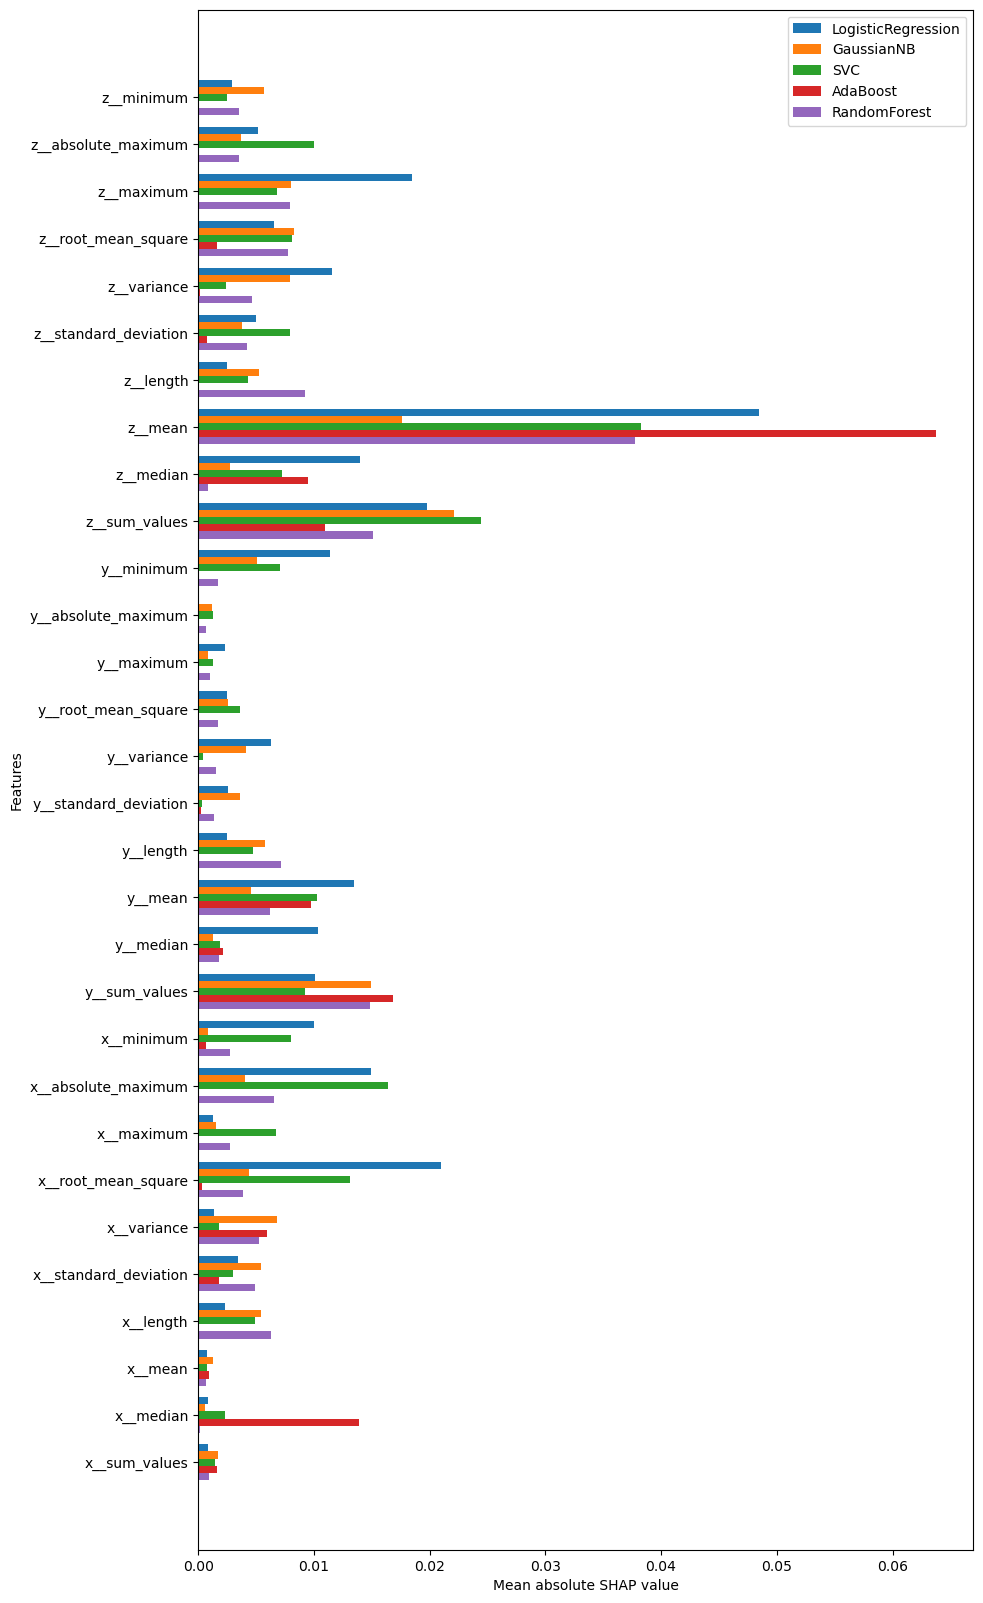

In [10]:
#BAR PLOT ABSOLUTE MEAN SHAP VALUES FOR ALL ML CLASSIFIERS


import matplotlib.pyplot as plt

feature_names = features.keys()
clf_names = ["LogisticRegression", "GaussianNB", "SVC", "AdaBoost","RandomForest"]
step = 0
fig, ax = plt.subplots(figsize=(10,20))
width = 0.15
i=0
ax.barh(np.arange(30)+width*2, np.array(shap_values_logreg.abs())[0], width, label=clf_names[i])
i+=1
ax.barh(np.arange(30)+width*1, np.array(shap_values_bayes.abs())[0], width, label=clf_names[i])
i+=1
ax.barh(np.arange(30)+width*0, np.array(shap_values_svc.abs())[0], width, label=clf_names[i])
i+=1
ax.barh(np.arange(30)-width*1, np.array(shap_values_adaboost.abs())[0], width, label=clf_names[i])
i+=1
ax.barh(np.arange(30)-width*2, np.array(shap_values_forest.abs())[0], width, label=clf_names[i])





    
    
ax.set_yticks(np.arange(30), labels=feature_names)
ax.set_ylabel("Features")
ax.set_xlabel("Mean absolute SHAP value")
ax.legend()
fig.show()